<a href="https://colab.research.google.com/github/okada-t-rafael/pytorch_study/blob/master/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import matplotlib.pyplot as plt
import torch

from torch import nn

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [2]:
if torch.cuda.is_available():
    !nvidia-smi

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# Exercise 1
Create a straight line dataset using the linear regression formula (`weight * X + bias`).
* Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.


In [4]:
# Setting weight and bias.
weight = 0.3
bias = 0.9

In [5]:
# Setting X and y
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + (torch.randn(size=(100, 1)) * 0.05)

In [6]:
# Create train/test split
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

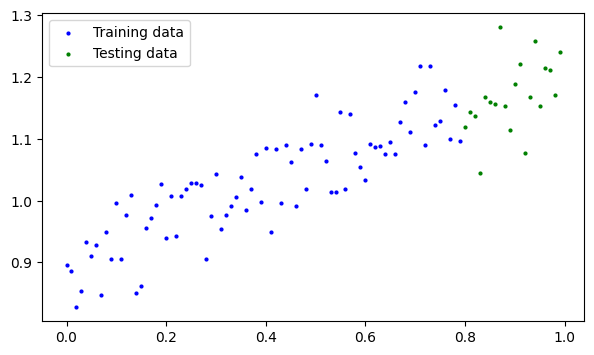

In [7]:
# Plot datapoints
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train[:train_split], c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.legend();

In [8]:
# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Exercise 2
Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one `weights` and one for `bias`.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its `state_dict()`.
* **Note**: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [9]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

In [10]:
# Set the manual seed
torch.manual_seed(42)
model = LinearRegressionModel()
print(model.state_dict())

# Put model on the target device
model.to(device);

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


# Exercise 3
Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD()` respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop shoud test the model on the test database every 20 epochs.

In [11]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01)

In [12]:
# Train/test Loop
torch.manual_seed(42)
epochs = 400

for epoch in range(epochs):
    model.train()

    # Forward pass
    train_preds = model(X_train)

    # Loss calculation
    loss = loss_fn(train_preds, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.12297309935092926 | Test loss: 0.337055504322052
Epoch: 20 | Loss: 0.08546926081180573 | Test loss: 0.22873148322105408
Epoch: 40 | Loss: 0.07729332149028778 | Test loss: 0.19146773219108582
Epoch: 60 | Loss: 0.07259728014469147 | Test loss: 0.1760939359664917
Epoch: 80 | Loss: 0.06809765845537186 | Test loss: 0.1611744910478592
Epoch: 100 | Loss: 0.06391005218029022 | Test loss: 0.15369932353496552
Epoch: 120 | Loss: 0.05995853617787361 | Test loss: 0.14131172001361847
Epoch: 140 | Loss: 0.056757472455501556 | Test loss: 0.13039395213127136
Epoch: 160 | Loss: 0.05404007434844971 | Test loss: 0.1191910058259964
Epoch: 180 | Loss: 0.051461588591337204 | Test loss: 0.10838651657104492
Epoch: 200 | Loss: 0.04911171272397041 | Test loss: 0.09829406440258026
Epoch: 220 | Loss: 0.04742380231618881 | Test loss: 0.08815916627645493
Epoch: 240 | Loss: 0.045945774763822556 | Test loss: 0.0793670117855072
Epoch: 260 | Loss: 0.04451976343989372 | Test loss: 0.07196703553199768
E

In [13]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3482]])),
             ('linear_layer.bias', tensor([0.8828]))])

# Exercise 4
Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (**note**: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [14]:
# Turn model into evaluaion mode
model. eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model(X_test)

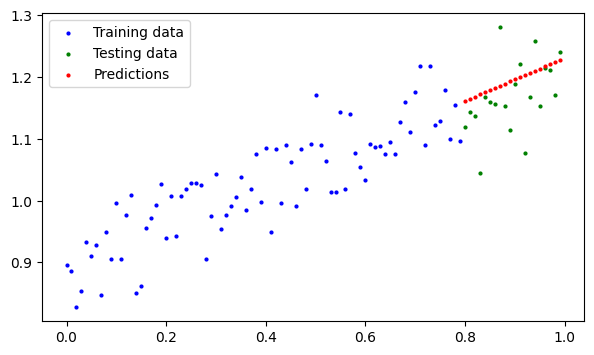

In [15]:
# Plot datapoints
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds, c="r", s=4, label="Predictions")
plt.legend();

# Exercise 5
Save your trained model's `state_dict()` to file
* Create a new instance of your model class you made in 2. And load in the `state_dict` you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [16]:
from pathlib import Path

# 1. Create model dictory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_exercise_model.pth


In [17]:
# Create a new instance of linear regression model V2
loaded_model = LinearRegressionModel()

# Load the saved model_1 state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
# Evaulated loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_1_pred = loaded_model(X_test)

y_preds == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])